# Major Question: How much does parental behaviors/impact result in Youth's usage of substances
For the regression, I wanted to ask how much parental behaviors impact Youth's behavior in the frequency of alcohol consumption.
For this, I utilized the below sets of data.

#### Target
- 'ALCYDAYS': This lets use know the days used alcohol in the past year
    - 1 = 1-11 Day
    - 2 = 12-49 Days
    - 3 = 50-99 Days
    - 4 = 100-299 Days
    - 5 = 300-365 Days
    - 6 = Non User or No Past Year Use

#### Features
- 'PARCHKHW': 'ParentChecksHomework',
- 'PARHLPHW': 'ParentHelpsHomework',
- 'PRCHORE2': 'ParentAssignsChores',
- 'PRLMTTV2': 'ParentLimitsTV',
- 'PARLMTSN': 'ParentLimitsSchoolNightOutings',
- 'PRGDJOB2': 'ParentGivesPraise',
- 'PRPROUD2': 'ParentExpressesPride',
- 'ARGUPAR': 'FrequentArgumentsWithParent',
- 'PRPKCIG2': 'ParentOpinionCigarettes',
- 'PRMJEVR2': 'ParentOpinionMarijuana',
- 'PRALDLY2': 'ParentOpinionAlcoholDaily'

# Imports


In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the dataset
df = pd.read_csv('../data/youth_data.csv')
df.head()

,IRALCFY,IRMJFY,IRCIGFM,IRSMKLSS30N,IRALCFM,IRMJFM,IRCIGAGE,IRSMKLSSTRY,IRALCAGE,IRMJAGE,...,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4
0,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,3,0,1,1,2,2,1,2,2
1,991,60,91.0,91,91.0,2.0,991,991,991,14,...,1,6,0,1,1,2,2,1,2,2
2,1,991,91.0,91,93.0,91.0,991,991,11,991,...,1,2,1,1,1,4,2,3,1,1
3,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,2,0,1,1,3,2,2,1,1
4,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,5,0,1,1,4,2,3,2,2


### 1. Random Forest

In [3]:
# Mappings
target_mapping = {
    'ALCYDAYS': 'DaysDrankAlcohol'
}

feature_mapping = {
    'PARCHKHW': 'ParentChecksHomework',
    'PARHLPHW': 'ParentHelpsHomework',
    'PRCHORE2': 'ParentAssignsChores',
    'PRLMTTV2': 'ParentLimitsTV',
    'PARLMTSN': 'ParentLimitsSchoolNightOutings',
    'PRGDJOB2': 'ParentGivesPraise',
    'PRPROUD2': 'ParentExpressesPride',
    'ARGUPAR': 'FrequentArgumentsWithParent',
    'PRPKCIG2': 'ParentOpinionCigarettes',
    'PRMJEVR2': 'ParentOpinionMarijuana',
    'PRALDLY2': 'ParentOpinionAlcoholDaily'
}

# Combine all mappings
column_mapping = {**target_mapping, **feature_mapping}
selected_columns = list(column_mapping.keys())

df_subset = df[selected_columns].rename(columns=column_mapping)

X = df_subset.drop(columns='DaysDrankAlcohol')
y = df_subset['DaysDrankAlcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\sahn1\OneDrive\Documentos\2025 Spring Quarter\DATA-5322\venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.04      0.07       338
           2       0.00      0.00      0.00       139
           3       0.40      0.04      0.07        52
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00         2
           6       0.83      0.99      0.90      2609

    accuracy                           0.82      3169
   macro avg       0.25      0.18      0.17      3169
weighted avg       0.72      0.82      0.75      3169



c:\Users\sahn1\OneDrive\Documentos\2025 Spring Quarter\DATA-5322\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sahn1\OneDrive\Documentos\2025 Spring Quarter\DATA-5322\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sahn1\OneDrive\Documentos\2025 Spring Quarter\DATA-5322\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

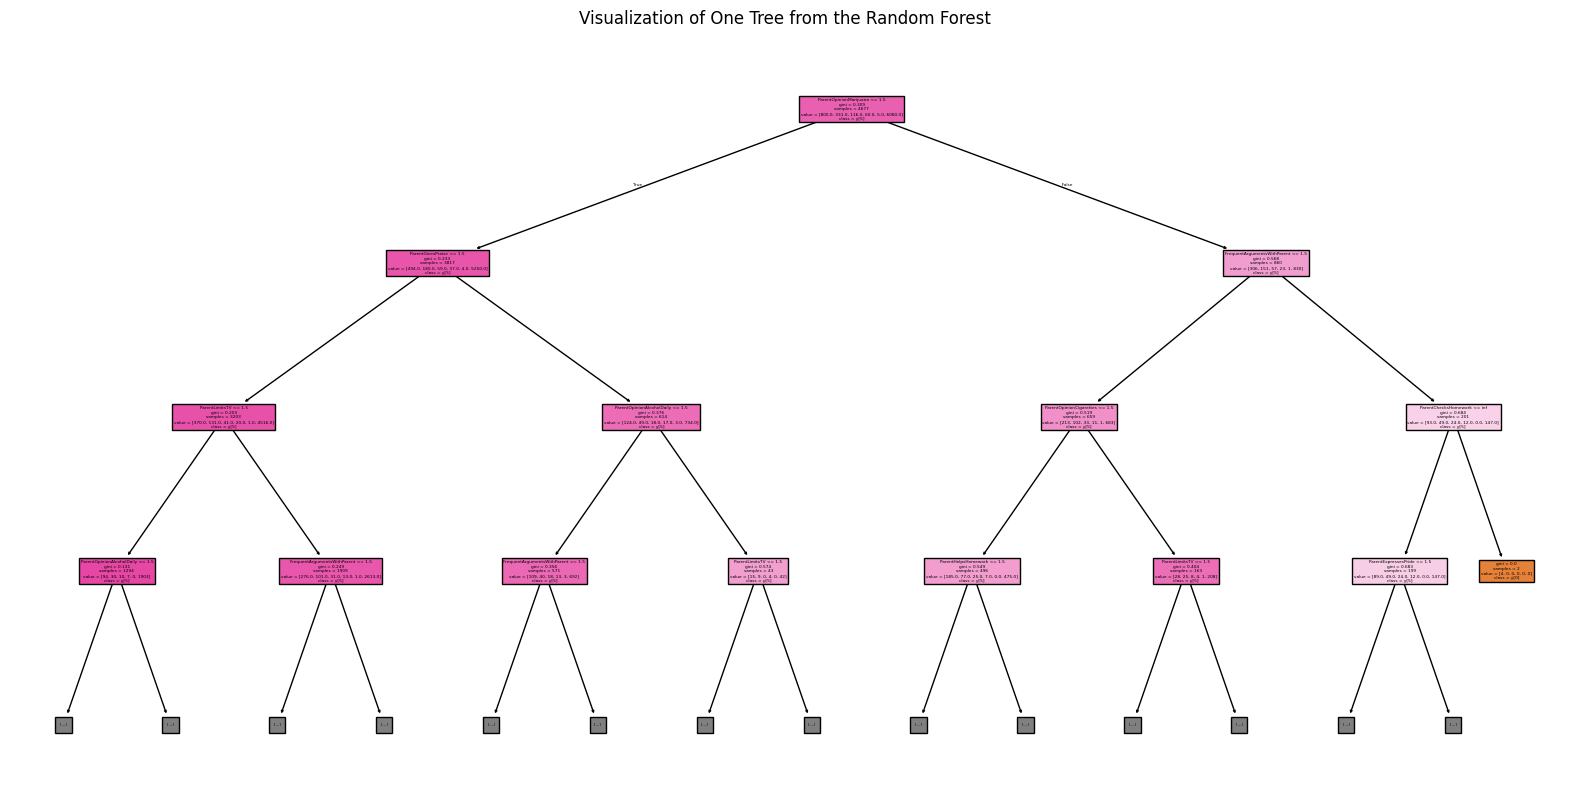

In [5]:
# Access the first tree in the forest
one_tree = best_rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(one_tree, filled=True, feature_names=X_train.columns, class_names=True, max_depth=3)
plt.title("Visualization of One Tree from the Random Forest")
plt.show()

## Brief Analysis
Overall Accuracy: 82%

Model is heavily biased toward class 6 (Non-users) as it dominatespredictions with:
- Precision: 83%
- Recall: 99%
- F1-score: 90%

All other classes (1 through 5, meaning any alcohol use) have very low precision and recall

Probably due to the class imbalance. Way more youth are labeled as 6 (non-user) than other categories.
That’s why the model "plays it safe" and predicts 6 almost every time. Terrible for real-world usefulness.

### 2. XGBoost

In [22]:
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Create the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=6,                     # 6 classes (1–6)
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# Train the model
xgb_clf.fit(X_train, y_train_xgb)
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_xgb_adjusted = y_pred_xgb + 1

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_adjusted))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_adjusted))

c:\Users\sahn1\OneDrive\Documentos\2025 Spring Quarter\DATA-5322\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:07:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[   7    5    0    1    0  325]
 [   2    1    0    0    0  136]
 [   1    3    0    0    0   48]
 [   0    1    0    0    0   28]
 [   0    0    0    0    0    2]
 [  13    5    0    4    0 2587]]

Classification Report:
              precision    recall  f1-score   support

           1       0.30      0.02      0.04       338
           2       0.07      0.01      0.01       139
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00         2
           6       0.83      0.99      0.90      2609

    accuracy                           0.82      3169
   macro avg       0.20      0.17      0.16      3169
weighted avg       0.72      0.82      0.75      3169



c:\Users\sahn1\OneDrive\Documentos\2025 Spring Quarter\DATA-5322\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sahn1\OneDrive\Documentos\2025 Spring Quarter\DATA-5322\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sahn1\OneDrive\Documentos\2025 Spring Quarter\DATA-5322\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

## Brief Analysis
Overall Accuracy: 82%

Model is heavily biased toward class 6 (Non-users) as it dominates predictions with:
- Precision: 83%
- Recall: 99%
- F1-score: 90%

All other classes (1 through 5, meaning any alcohol use) have very low precision and recall
- Macro average F1 = 0.16.  

The model is not learning meaningful distinctions across classes. As mentioned before, it's most likely due to the class imbalance.